This notebook is part of the SelfiSys project and is licensed under the GNU General Public License v3.0 or later (GPL-3.0-or-later). See the accompanying LICENSE file or visit [GNU GPL](https://www.gnu.org/licenses/gpl-3.0.en.html) for details.

Tristan Hoellinger<br/>
Institut d'Astrophysique de Paris</br>
tristan.hoellinger@iap.fr

# Investigate the binning and interpolation strategy

Validate the interpolation strategy for representing power spectra.

## Set up the environment and parameters

In [1]:
from selfisys.global_parameters import *

wd = Path(OUTPUT_PATH) / "expl_notebooks/interpolation/"

In [2]:
%load_ext autoreload
%autoreload 2

from pathlib import Path
import matplotlib.pyplot as plt

from selfisys.setup_model import *
from selfisys.utils.tools import get_k_max
from selfisys.utils.plot_params import *
from selfisys.utils.plot_examples import *

# Configure plotting aesthetics for consistent visualisation
setup_plotting()

modeldir = Path(wd) / "model"
modeldir.mkdir(parents=True, exist_ok=True)
(Path(wd) / "Figures").mkdir(parents=True, exist_ok=True)

In [3]:
size = 512
L = 3600
Pinit = 50
S = 64

## Compute a power spectrum and plot it

In [4]:
k_max = get_k_max(L, size)  # k_max in h/Mpc
print(f"k_max = {k_max}")
# Cosmo at the expansion point:
params_planck = params_planck_kmax_missing.copy()
params_planck["k_max"] = k_max
# Cosmo for BBKS spectrum with fiducial cosmology (for normalisation):
params_BBKS = params_BBKS_kmax_missing.copy()
params_BBKS["k_max"] = k_max
# Groundtruth cosmology:
params_cosmo_obs = params_cosmo_obs_kmax_missing.copy()
params_cosmo_obs["k_max"] = k_max

k_max = 0.774


In [5]:
params = setup_model(
    workdir=modeldir,
    params_planck=params_planck,
    params_P0=params_BBKS,
    size=size,
    L=L,
    S=S,
    Pinit=Pinit,
    force=True,
)
(
    size,
    L,
    P,
    S,
    G_sim_path,
    G_ss_path,
    Pbins_bnd,
    Pbins,
    k_s,
    P_ss_obj_path,
    P_0,
    planck_Pk,
) = params

[20:59:12|INFO      ]|(selfisys.setup_model) Computing Fourier grid...
[20:59:12|STATUS    ]|Setting up Fourier grid...
[20:59:19|STATUS    ]|Setting up Fourier grid done.
[20:59:19|STATUS    ]|Write Fourier grid in data file '/Users/hoellinger/SELFI/expl_notebooks/interpolation/model/G_sim.h5'...
[20:59:19|DIAGNOSTIC]==|L0=3600, L1=3600, L2=3600
[20:59:19|DIAGNOSTIC]==|N0=512, N1=512, N2=512, N2_HC=257, N_HC=67371008, NUM_MODES=140945
[20:59:20|STATUS    ]|Write Fourier grid in data file '/Users/hoellinger/SELFI/expl_notebooks/interpolation/model/G_sim.h5' done.
[20:59:20|INFO      ]|(selfisys.setup_model) Computing Fourier grid done.
[20:59:20|STATUS    ]|Setting up Fourier grid...
[20:59:20|STATUS    ]|Setting up Fourier grid done.
[20:59:20|STATUS    ]|Write Fourier grid in data file '/Users/hoellinger/SELFI/expl_notebooks/interpolation/model/G_ss.h5'...
[20:59:20|DIAGNOSTIC]==|L0=3600, L1=3600, L2=3600
[20:59:20|DIAGNOSTIC]==|N0=512, N1=512, N2=512, N2_HC=257, N_HC=67371008, NUM_M

In [6]:
from pysbmy.power import PowerSpectrum, FourierGrid

true_P = PowerSpectrum(L, L, L, size, size, size, params_planck)
G_sim = FourierGrid.read(G_sim_path)

[20:59:20|STATUS    ]|Setting up Fourier grid...
[20:59:28|STATUS    ]|Setting up Fourier grid done.
[20:59:28|STATUS    ]|Read Fourier grid in data file '/Users/hoellinger/SELFI/expl_notebooks/interpolation/model/G_sim.h5'...
[20:59:28|DIAGNOSTIC]==|L0=3600.0, L1=3600.0, L2=3600.0
[20:59:28|DIAGNOSTIC]==|N0=512, N1=512, N2=512, N2_HC=257, N_HC=67371008, NUM_MODES=140945
[20:59:28|STATUS    ]|Read Fourier grid in data file '/Users/hoellinger/SELFI/expl_notebooks/interpolation/model/G_sim.h5' done.


[20:59:29|INFO      ]|Figure saved to: /Users/hoellinger/SELFI/expl_notebooks/interpolation/Figures/summary.pdf


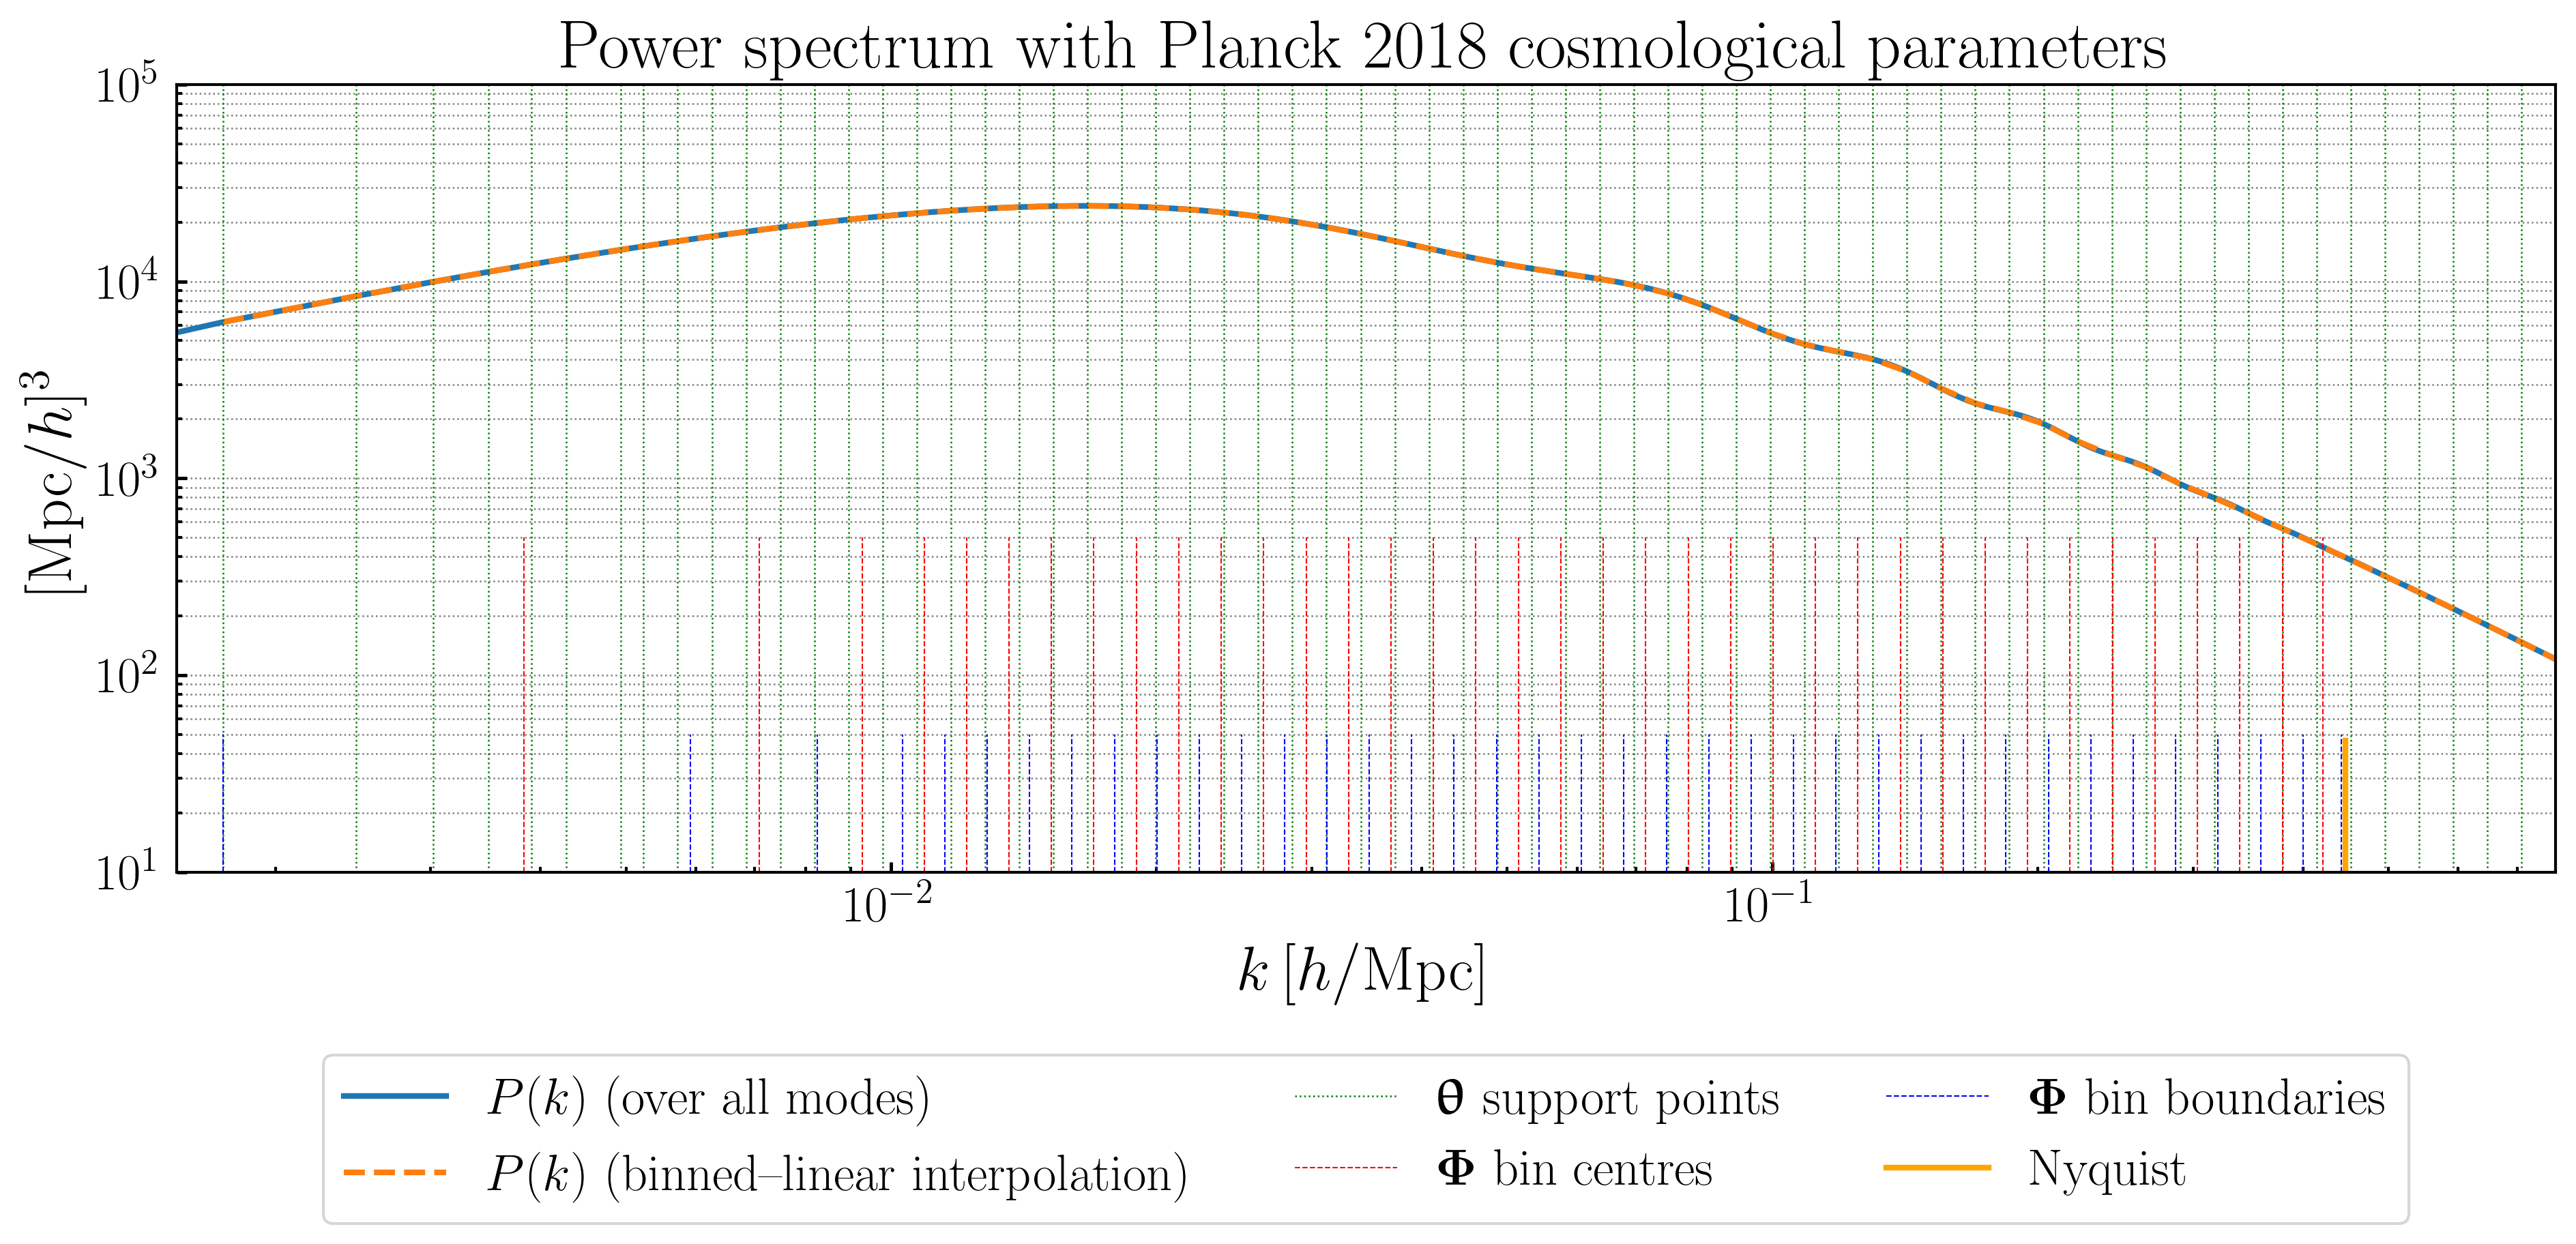

In [7]:
plot_power_spectrum(
    G_sim,
    true_P,
    k_s,
    planck_Pk,
    Pbins,
    Pbins_bnd,
    size,
    L,
    wd,
    "Power spectrum with Planck 2018 cosmological parameters",
)

[20:59:30|INFO      ]|Figure saved to: /Users/hoellinger/SELFI/expl_notebooks/interpolation/Figures/summary_relerr.pdf
[20:59:30|INFO      ]|Max relative error over all support points: 0.663%
[20:59:30|INFO      ]|Max relative error up to 1D Nyquist frequency: 0.134%
[20:59:30|INFO      ]|Max relative error up to k = 2e-1: 0.069%


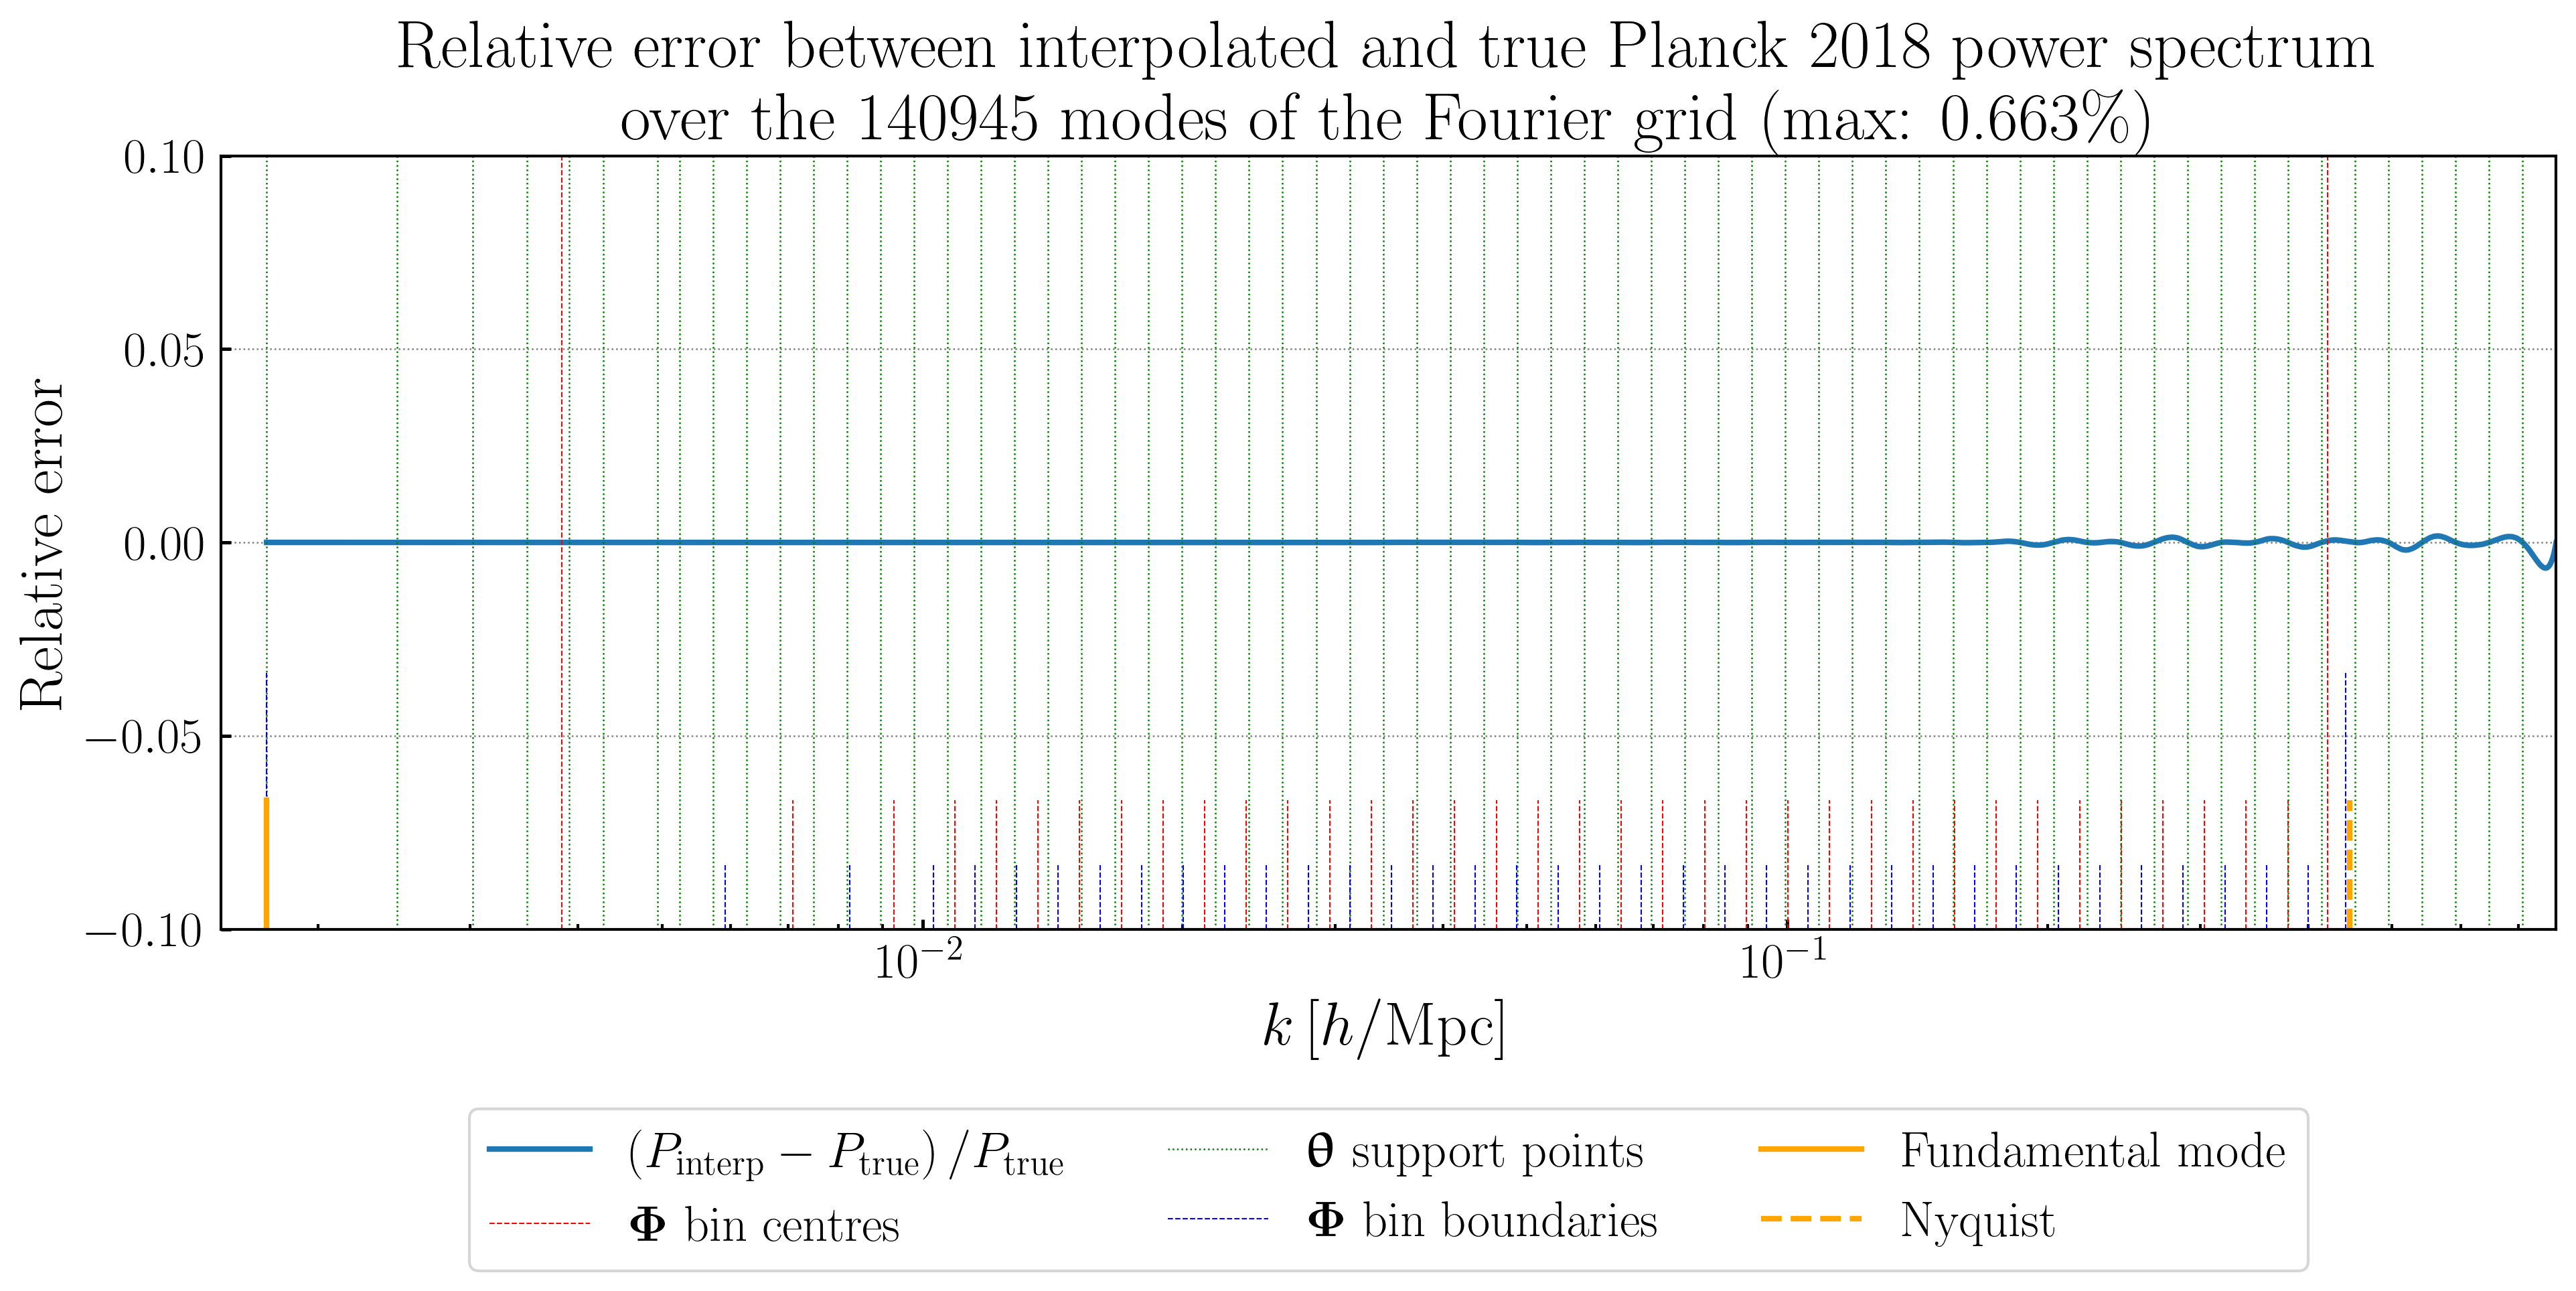

In [8]:
relative_error_analysis(G_sim, true_P, k_s, planck_Pk, Pbins, Pbins_bnd, size, L, wd)